In [ ]:
# 如何与统计学家共享数据
## 项目介绍
    该项目是由Jeff Leek发起的一份为任何需要与统计学家或数据科学家共享数据的人准备的指南，指南的目标目标受众是：
        - 需要统计学家或数据科学家为他们分析数据的合作者
        - 寻求咨询建议的各个学科的学生或博士后
        - 从事整理/清理/争吵数据集的初级统计学学生
    该指南就共享数据的最佳方式提供一些指导，以避免从数据收集到数据分析过渡中最常见的陷阱和延迟来源。
    Jeff Leek认为统计人员应该能够在他们到达的任何状态下处理数据。
    重要的是查看原始数据，了解处理管道中的步骤，并能够在数据分析中纳入隐藏的可变性来源。
    另一方面，对于许多数据类型，处理步骤都经过了良好的记录和标准化。
    因此，在拜访统计人员之前，可以执行将数据从原始形式转换为可直接分析的形式的工作。
    这可能会大大加快周转时间，因为统计人员不必先完成所有预处理步骤
## 技术类型
    指南类
## 版本发布历史
    该项目于2013年11月7日由Jeff Leek编写最初版本并提交，截止到2016年11月9日最后一次提交一共有11个版本
## 主要贡献者构成
    Jeff Leek - 写了初始版本。
    L.Collado-Torres - 修复了错别字，添加了链接。
    Nick Reich - 添加了将数据存储为文本的提示。
    Nick Horton - 次要措辞建议。

In [28]:
var openDigger = require('../src/open_digger');

In [9]:
limit=10

10

In [23]:
var startYear = 2015, endYear = 2021;
var years = [];
var all = [];
for (var y = startYear; y <= endYear; y++) years.push(y);

7

In [126]:
function middle(args){
   args.sort() //排序
   if(args.length%2===0){ 
       return ((args[args.length/2]+args[args.length/2-1])/2);
   }else{
       return args[parseInt(args.length/2)];
  }
}

function average(nums) {
    return nums.reduce((a, b) => a + b) / nums.length;
}

In [66]:
timeline=[]
for (var i=2015; i<2022; i++)
{
      for (var j=1; j<13; j++){
          timeline.push(new Date(`${i}-${j}`))
          //console.log(`${i}-${j}`)
      }
}

84

## 每月新增 Star 和 Frok 的个数

In [133]:
openDigger.driver.clickhouse.query(
    `SELECT count(*) as count,toYear(created_at) as year,toMonth(created_at) as month
    FROM github_log.events
    WHERE repo_name = 'jtleek/datasharing' and type = 'WatchEvent'
    GROUP BY toYear(created_at),toMonth(created_at)`
).then(res=>{
    all = timeline.map(x=>{
    let temp = res.filter(r=>r.year==x.getFullYear() && r.month==x.getMonth()+1);
    return {time:x,count:temp.length>0?parseInt(temp[0].count):0};
    })
})

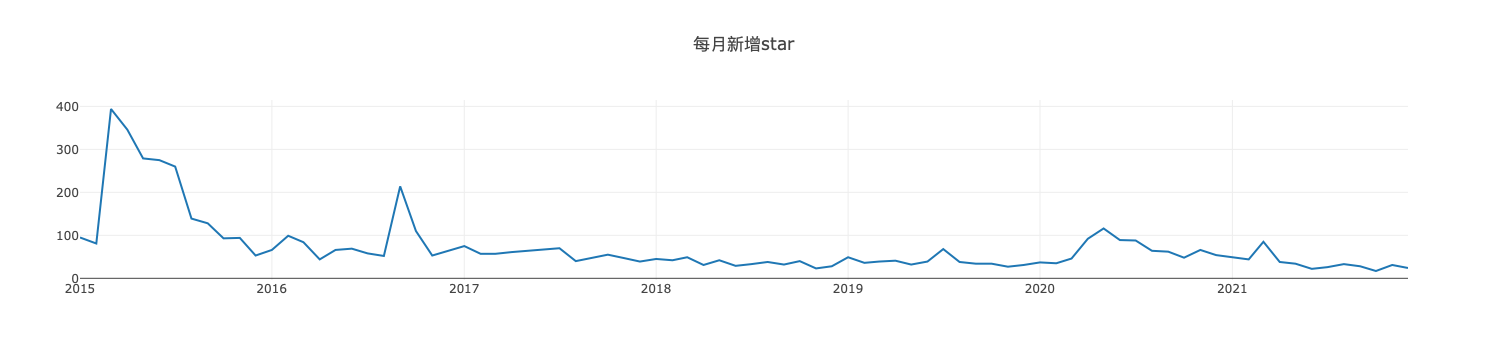

In [124]:
openDigger.render.plotly([{
        x: all.map(d => d.time),
        y: all.map(d => d.count),
        name: '新增star',mode: 'scatter'
    }], {title: `每月新增star`, xasix: { type: 'category' } })

In [134]:
console.table(all)

┌─────────┬──────────────────────────┬───────┐
│ (index) │           time           │ count │
├─────────┼──────────────────────────┼───────┤
│    0    │ 2015-01-01T00:00:00.000Z │  95   │
│    1    │ 2015-02-01T00:00:00.000Z │  81   │
│    2    │ 2015-03-01T00:00:00.000Z │  394  │
│    3    │ 2015-04-01T00:00:00.000Z │  346  │
│    4    │ 2015-05-01T00:00:00.000Z │  279  │
│    5    │ 2015-06-01T00:00:00.000Z │  275  │
│    6    │ 2015-07-01T00:00:00.000Z │  260  │
│    7    │ 2015-08-01T00:00:00.000Z │  139  │
│    8    │ 2015-09-01T00:00:00.000Z │  128  │
│    9    │ 2015-10-01T00:00:00.000Z │  93   │
│   10    │ 2015-11-01T00:00:00.000Z │  94   │
│   11    │ 2015-12-01T00:00:00.000Z │  53   │
│   12    │ 2016-01-01T00:00:00.000Z │  66   │
│   13    │ 2016-02-01T00:00:00.000Z │  99   │
│   14    │ 2016-03-01T00:00:00.000Z │  84   │
│   15    │ 2016-04-01T00:00:00.000Z │  44   │
│   16    │ 2016-05-01T00:00:00.000Z │  66   │
│   17    │ 2016-06-01T00:00:00.000Z │  69   │
│   18    │ 2

In [138]:
openDigger.driver.clickhouse.query(
    `SELECT count(*) as count,toYear(created_at) as year,toMonth(created_at) as month
    FROM github_log.events
    WHERE repo_name = 'jtleek/datasharing' and type = 'ForkEvent'
    GROUP BY toYear(created_at),toMonth(created_at)`
).then(res=>{
    all = timeline.map(x=>{
    let temp = res.filter(r=>r.year==x.getFullYear() && r.month==x.getMonth()+1);
    return {time:x,count:temp.length>0?parseInt(temp[0].count):0};
    })
})

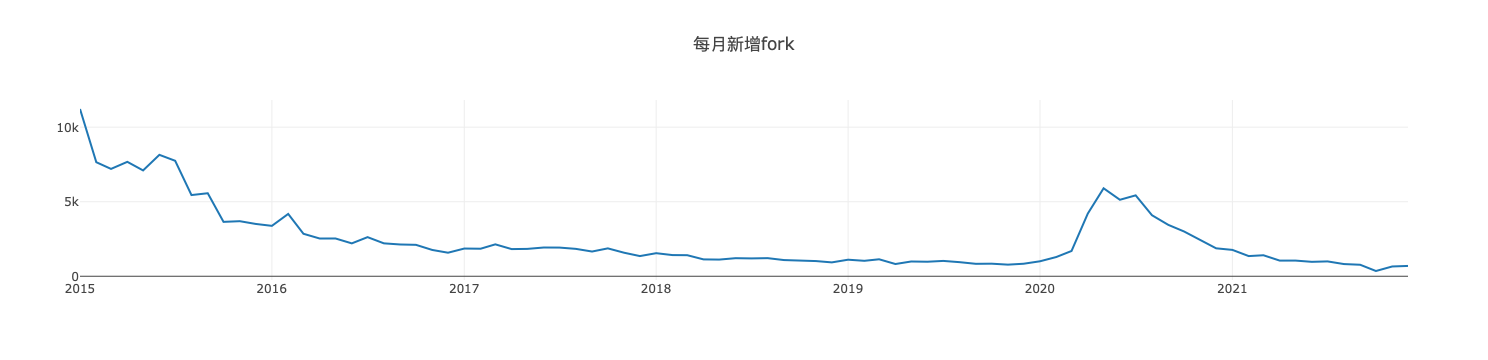

┌─────────┬──────────────────────────┬───────┐
│ (index) │           time           │ count │
├─────────┼──────────────────────────┼───────┤
│    0    │ 2015-01-01T00:00:00.000Z │ 11221 │
│    1    │ 2015-02-01T00:00:00.000Z │ 7651  │
│    2    │ 2015-03-01T00:00:00.000Z │ 7202  │
│    3    │ 2015-04-01T00:00:00.000Z │ 7676  │
│    4    │ 2015-05-01T00:00:00.000Z │ 7100  │
│    5    │ 2015-06-01T00:00:00.000Z │ 8146  │
│    6    │ 2015-07-01T00:00:00.000Z │ 7747  │
│    7    │ 2015-08-01T00:00:00.000Z │ 5448  │
│    8    │ 2015-09-01T00:00:00.000Z │ 5569  │
│    9    │ 2015-10-01T00:00:00.000Z │ 3649  │
│   10    │ 2015-11-01T00:00:00.000Z │ 3694  │
│   11    │ 2015-12-01T00:00:00.000Z │ 3511  │
│   12    │ 2016-01-01T00:00:00.000Z │ 3381  │
│   13    │ 2016-02-01T00:00:00.000Z │ 4180  │
│   14    │ 2016-03-01T00:00:00.000Z │ 2850  │
│   15    │ 2016-04-01T00:00:00.000Z │ 2531  │
│   16    │ 2016-05-01T00:00:00.000Z │ 2534  │
│   17    │ 2016-06-01T00:00:00.000Z │ 2206  │
│   18    │ 2

In [139]:
openDigger.render.plotly([{
        x: all.map(d => d.time),
        y: all.map(d => d.count),
        name: '新增fork',mode: 'scatter'
    }], {title: `每月新增fork`, xasix: { type: 'category' } })
console.table(all)

## 每月打开 Issue 和 关闭 Issue 的个数

In [140]:
openDigger.driver.clickhouse.query(
    `SELECT count(*) as count,toYear(issue_created_at) as year,toMonth(issue_created_at) as month
    FROM github_log.events
    WHERE repo_name = 'jtleek/datasharing' and type = 'IssuesEvent'
    GROUP BY year,month`
).then(res=>{
    all = timeline.map(x=>{
    let temp = res.filter(r=>r.year==x.getFullYear() && r.month==x.getMonth()+1);
    return {time:x,count:temp.length>0?parseInt(temp[0].count):0};
    })
})

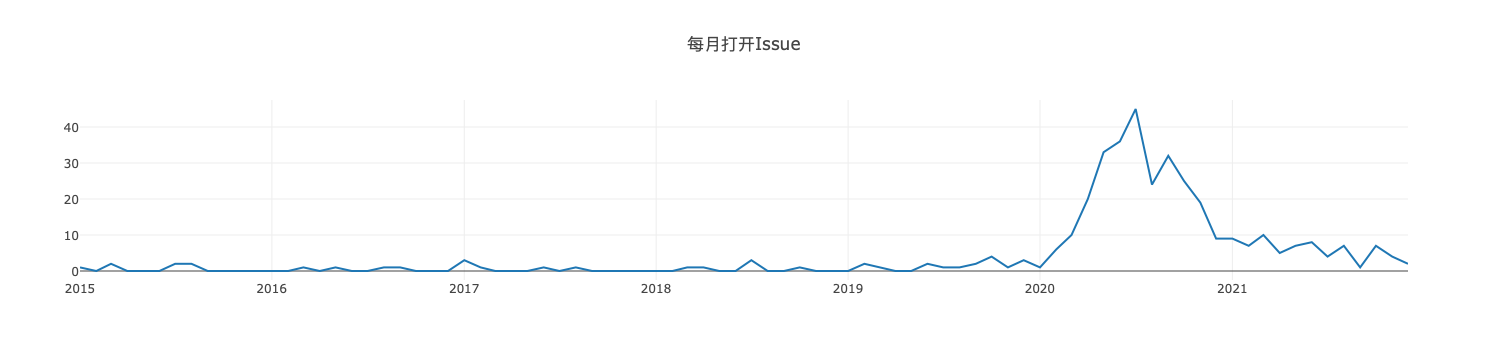

┌─────────┬──────────────────────────┬───────┐
│ (index) │           time           │ count │
├─────────┼──────────────────────────┼───────┤
│    0    │ 2015-01-01T00:00:00.000Z │   1   │
│    1    │ 2015-02-01T00:00:00.000Z │   0   │
│    2    │ 2015-03-01T00:00:00.000Z │   2   │
│    3    │ 2015-04-01T00:00:00.000Z │   0   │
│    4    │ 2015-05-01T00:00:00.000Z │   0   │
│    5    │ 2015-06-01T00:00:00.000Z │   0   │
│    6    │ 2015-07-01T00:00:00.000Z │   2   │
│    7    │ 2015-08-01T00:00:00.000Z │   2   │
│    8    │ 2015-09-01T00:00:00.000Z │   0   │
│    9    │ 2015-10-01T00:00:00.000Z │   0   │
│   10    │ 2015-11-01T00:00:00.000Z │   0   │
│   11    │ 2015-12-01T00:00:00.000Z │   0   │
│   12    │ 2016-01-01T00:00:00.000Z │   0   │
│   13    │ 2016-02-01T00:00:00.000Z │   0   │
│   14    │ 2016-03-01T00:00:00.000Z │   1   │
│   15    │ 2016-04-01T00:00:00.000Z │   0   │
│   16    │ 2016-05-01T00:00:00.000Z │   1   │
│   17    │ 2016-06-01T00:00:00.000Z │   0   │
│   18    │ 2

In [142]:
openDigger.render.plotly([{
        x: all.map(d => d.time),
        y: all.map(d => d.count),
        name: '打开Issue',mode: 'scatter'
    }], {title: `每月打开Issue`, xasix: { type: 'category' } })
console.table(all)

In [143]:
openDigger.driver.clickhouse.query(
    `SELECT count(*) as count,toYear(issue_closed_at) as year,toMonth(issue_closed_at) as month
    FROM github_log.events
    WHERE repo_name = 'jtleek/datasharing' and type = 'IssuesEvent'
    GROUP BY year,month`
).then(res=>{
    all = timeline.map(x=>{
    let temp = res.filter(r=>r.year==x.getFullYear() && r.month==x.getMonth()+1);
    return {time:x,count:temp.length>0?parseInt(temp[0].count):0};
    })
})

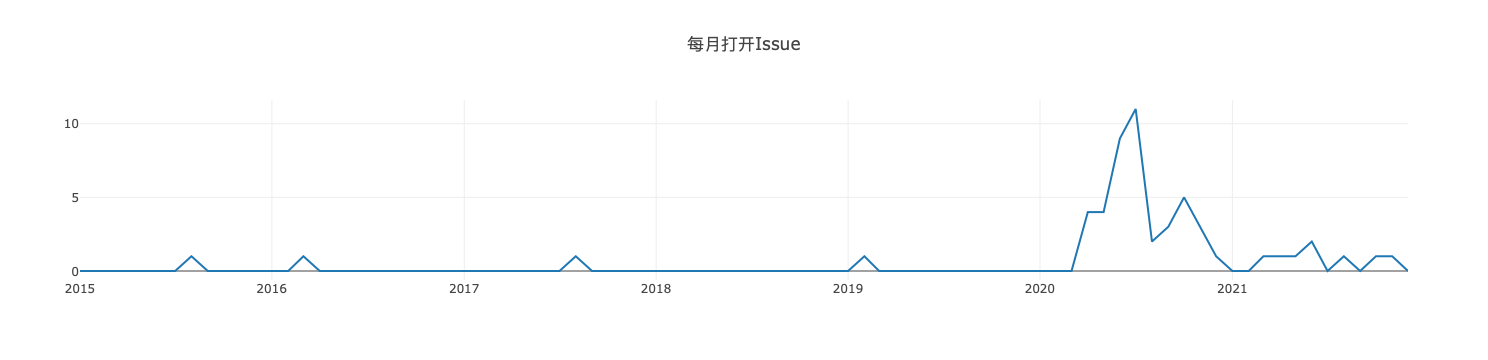

┌─────────┬──────────────────────────┬───────┐
│ (index) │           time           │ count │
├─────────┼──────────────────────────┼───────┤
│    0    │ 2015-01-01T00:00:00.000Z │   0   │
│    1    │ 2015-02-01T00:00:00.000Z │   0   │
│    2    │ 2015-03-01T00:00:00.000Z │   0   │
│    3    │ 2015-04-01T00:00:00.000Z │   0   │
│    4    │ 2015-05-01T00:00:00.000Z │   0   │
│    5    │ 2015-06-01T00:00:00.000Z │   0   │
│    6    │ 2015-07-01T00:00:00.000Z │   0   │
│    7    │ 2015-08-01T00:00:00.000Z │   1   │
│    8    │ 2015-09-01T00:00:00.000Z │   0   │
│    9    │ 2015-10-01T00:00:00.000Z │   0   │
│   10    │ 2015-11-01T00:00:00.000Z │   0   │
│   11    │ 2015-12-01T00:00:00.000Z │   0   │
│   12    │ 2016-01-01T00:00:00.000Z │   0   │
│   13    │ 2016-02-01T00:00:00.000Z │   0   │
│   14    │ 2016-03-01T00:00:00.000Z │   1   │
│   15    │ 2016-04-01T00:00:00.000Z │   0   │
│   16    │ 2016-05-01T00:00:00.000Z │   0   │
│   17    │ 2016-06-01T00:00:00.000Z │   0   │
│   18    │ 2

In [144]:
openDigger.render.plotly([{
        x: all.map(d => d.time),
        y: all.map(d => d.count),
        name: '关闭Issue',mode: 'scatter'
    }], {title: `每月关闭Issue`, xasix: { type: 'category' } })
console.table(all)

## 每月打开 PR 和合入 PR 的个数

In [150]:
openDigger.driver.clickhouse.query(
    `SELECT count(*) as count,toYear(created_at) as year,toMonth(created_at) as month
    FROM github_log.events
    WHERE repo_name = 'jtleek/datasharing' and type = 'PullRequestEvent'
    GROUP BY year,month`
).then(res=>{
    all = timeline.map(x=>{
    let temp = res.filter(r=>r.year==x.getFullYear() && r.month==x.getMonth()+1);
    return {time:x,count:temp.length>0?parseInt(temp[0].count):0};
    })
})

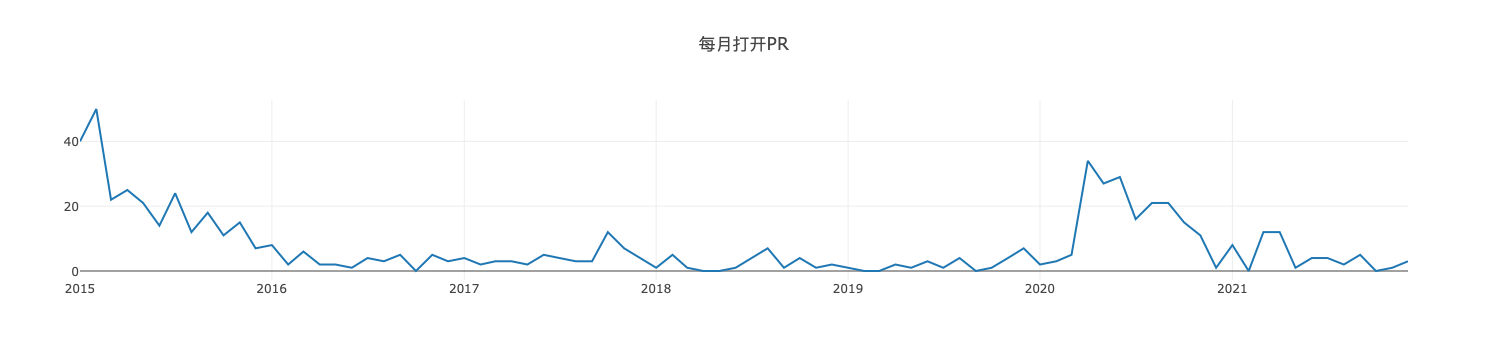

┌─────────┬──────────────────────────┬───────┐
│ (index) │           time           │ count │
├─────────┼──────────────────────────┼───────┤
│    0    │ 2015-01-01T00:00:00.000Z │  40   │
│    1    │ 2015-02-01T00:00:00.000Z │  50   │
│    2    │ 2015-03-01T00:00:00.000Z │  22   │
│    3    │ 2015-04-01T00:00:00.000Z │  25   │
│    4    │ 2015-05-01T00:00:00.000Z │  21   │
│    5    │ 2015-06-01T00:00:00.000Z │  14   │
│    6    │ 2015-07-01T00:00:00.000Z │  24   │
│    7    │ 2015-08-01T00:00:00.000Z │  12   │
│    8    │ 2015-09-01T00:00:00.000Z │  18   │
│    9    │ 2015-10-01T00:00:00.000Z │  11   │
│   10    │ 2015-11-01T00:00:00.000Z │  15   │
│   11    │ 2015-12-01T00:00:00.000Z │   7   │
│   12    │ 2016-01-01T00:00:00.000Z │   8   │
│   13    │ 2016-02-01T00:00:00.000Z │   2   │
│   14    │ 2016-03-01T00:00:00.000Z │   6   │
│   15    │ 2016-04-01T00:00:00.000Z │   2   │
│   16    │ 2016-05-01T00:00:00.000Z │   2   │
│   17    │ 2016-06-01T00:00:00.000Z │   1   │
│   18    │ 2

In [151]:
openDigger.render.plotly([{
        x: all.map(d => d.time),
        y: all.map(d => d.count),
        name: '打开PR',mode: 'scatter'
    }], {title: `每月打开PR`, xasix: { type: 'category' } })
console.table(all)

In [148]:
openDigger.driver.clickhouse.query(
    `SELECT count(*) as count,toYear(pull_merged_at) as year,toMonth(pull_merged_at) as month
    FROM github_log.events
    WHERE repo_name = 'jtleek/datasharing' and type = 'PullRequestEvent'
    GROUP BY year,month`
).then(res=>{
    all = timeline.map(x=>{
    let temp = res.filter(r=>r.year==x.getFullYear() && r.month==x.getMonth()+1);
    return {time:x,count:temp.length>0?parseInt(temp[0].count):0};
    })
})

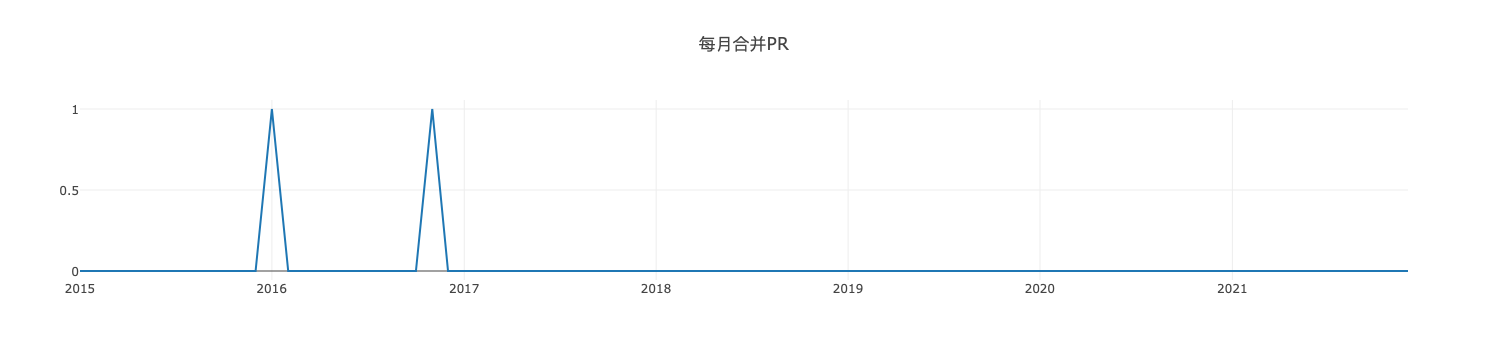

┌─────────┬──────────────────────────┬───────┐
│ (index) │           time           │ count │
├─────────┼──────────────────────────┼───────┤
│    0    │ 2015-01-01T00:00:00.000Z │   0   │
│    1    │ 2015-02-01T00:00:00.000Z │   0   │
│    2    │ 2015-03-01T00:00:00.000Z │   0   │
│    3    │ 2015-04-01T00:00:00.000Z │   0   │
│    4    │ 2015-05-01T00:00:00.000Z │   0   │
│    5    │ 2015-06-01T00:00:00.000Z │   0   │
│    6    │ 2015-07-01T00:00:00.000Z │   0   │
│    7    │ 2015-08-01T00:00:00.000Z │   0   │
│    8    │ 2015-09-01T00:00:00.000Z │   0   │
│    9    │ 2015-10-01T00:00:00.000Z │   0   │
│   10    │ 2015-11-01T00:00:00.000Z │   0   │
│   11    │ 2015-12-01T00:00:00.000Z │   0   │
│   12    │ 2016-01-01T00:00:00.000Z │   1   │
│   13    │ 2016-02-01T00:00:00.000Z │   0   │
│   14    │ 2016-03-01T00:00:00.000Z │   0   │
│   15    │ 2016-04-01T00:00:00.000Z │   0   │
│   16    │ 2016-05-01T00:00:00.000Z │   0   │
│   17    │ 2016-06-01T00:00:00.000Z │   0   │
│   18    │ 2

In [149]:
openDigger.render.plotly([{
        x: all.map(d => d.time),
        y: all.map(d => d.count),
        name: '合并PR',mode: 'scatter'
    }], {title: `每月合并PR`, xasix: { type: 'category' } })
console.table(all)

In [169]:
openDigger.driver.clickhouse.query(
    `SELECT count(*) as count,toYear(created_at) as year,toMonth(created_at) as month
    FROM (SELECT DISTINCT actor_id,created_at FROM github_log.events WHERE repo_name = 'jtleek/datasharing')
    GROUP BY year,month`
).then(res=>{
    all = timeline.map(x=>{
    let temp = res.filter(r=>r.year==x.getFullYear() && r.month==x.getMonth()+1);
    return {time:x,count:temp.length>0?parseInt(temp[0].count):0};
    })
})

## 每月活跃开发者数量

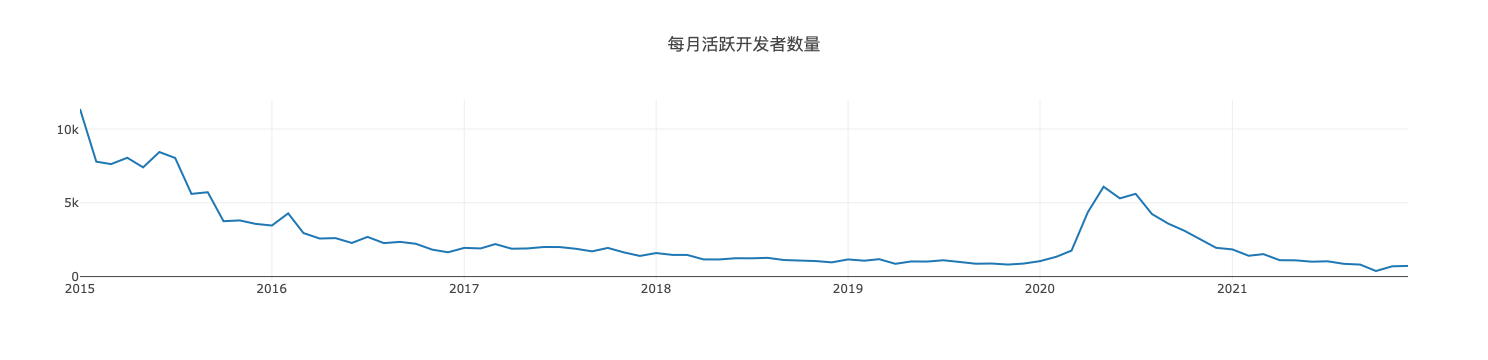

┌─────────┬──────────────────────────┬───────┐
│ (index) │           time           │ count │
├─────────┼──────────────────────────┼───────┤
│    0    │ 2015-01-01T00:00:00.000Z │ 11356 │
│    1    │ 2015-02-01T00:00:00.000Z │ 7787  │
│    2    │ 2015-03-01T00:00:00.000Z │ 7622  │
│    3    │ 2015-04-01T00:00:00.000Z │ 8051  │
│    4    │ 2015-05-01T00:00:00.000Z │ 7401  │
│    5    │ 2015-06-01T00:00:00.000Z │ 8439  │
│    6    │ 2015-07-01T00:00:00.000Z │ 8036  │
│    7    │ 2015-08-01T00:00:00.000Z │ 5603  │
│    8    │ 2015-09-01T00:00:00.000Z │ 5716  │
│    9    │ 2015-10-01T00:00:00.000Z │ 3753  │
│   10    │ 2015-11-01T00:00:00.000Z │ 3804  │
│   11    │ 2015-12-01T00:00:00.000Z │ 3571  │
│   12    │ 2016-01-01T00:00:00.000Z │ 3459  │
│   13    │ 2016-02-01T00:00:00.000Z │ 4283  │
│   14    │ 2016-03-01T00:00:00.000Z │ 2948  │
│   15    │ 2016-04-01T00:00:00.000Z │ 2578  │
│   16    │ 2016-05-01T00:00:00.000Z │ 2606  │
│   17    │ 2016-06-01T00:00:00.000Z │ 2277  │
│   18    │ 2

In [170]:
openDigger.render.plotly([{
        x: all.map(d => d.time),
        y: all.map(d => d.count),
        name: '活跃开发者数量',mode: 'scatter'
    }], {title: `每月活跃开发者数量`, xasix: { type: 'category' } })
console.table(all)

## Issue 从打开到关闭的平均时长和中位数

In [180]:
openDigger.driver.clickhouse.query(
    `SELECT issue_closed_at,issue_created_at
    FROM github_log.events
    WHERE repo_name = 'jtleek/datasharing' and type = 'IssuesEvent' and toYear(issue_closed_at)>2010 and toYear(issue_created_at)>2010` 
).then(res=>{
    all = res
})

In [184]:
console.log(middle(all.map(x=>(new Date(x.issue_closed_at)-new Date(x.issue_created_at))/(24*3600*1000))))
console.log(average(all.map(x=>(new Date(x.issue_closed_at)-new Date(x.issue_created_at))/(24*3600*1000))))

0.0010763888888888889
9.52600033068783


## PR 从打开到合入的平均时长和中位数

In [185]:
openDigger.driver.clickhouse.query(
    `SELECT pull_merged_at,created_at
    FROM github_log.events
    WHERE repo_name = 'jtleek/datasharing' and type = 'PullRequestEvent' and toYear(pull_merged_at)>2010 and toYear(created_at)>2010` 
).then(res=>{
    all = res
})

In [189]:
console.log(middle(all.map(x=>(new Date(x.pull_merged_at)-new Date(x.created_at))/(24*3600*1000))))
console.log(average(all.map(x=>(new Date(x.pull_merged_at)-new Date(x.created_at))/(24*3600*1000))))

0
0


In [ ]:
## 项目基础数据的变化趋势

### 关键时间节点

2015年年初，项目的star和fork较多，项目在2015年具有较高知名度
2020年3-5月，项目新增fork和PR较多，项目在2020年热度有回升，且较多人用PR进行测试

### 开发者数量的变化趋势

项目在2015年初参与的开发者达到高峰，然后进入持续衰减，在2020年热度回升，开发者数量的随之增多随后再次慢慢衰减

### 项目发展活跃的主要因素

参与者人数较多，团队的规模大（即提交代码的参与者多）。
核心开发者都参与过众多的开源项目，或在其它项目中进行过合作
对请求推送的响应能够鼓励核心贡献者。项目获得的星评及请求推送数量较多，贡献者容易受到鼓舞。对于项目是一种积极推动。
数据科学的在近几年的火热也进一步提升了项目的知名度。